# Project Overview
This project focuses on predicting loan default risk using machine learning. Financial institutions use credit risk models to determine loan approval probability and prevent financial losses from defaulters.

# Objective
Build a classification model to predict whether a loan applicant will default on their payment obligations based on their financial history, demographics, and credit metrics.

# SetUp and Understanding

In [68]:
#Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
loan_df = pd.read_csv("Loan_Default.csv")

In [70]:
loan_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [71]:
loan_df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [73]:
loan_df.shape

(255347, 18)

In [74]:
loan_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [75]:
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# Exploratory Data Analysis

1. loan default by Age, MonthsEmployed, LoanAmount, Income, CreditScore','LoanTerm,  InterestRate

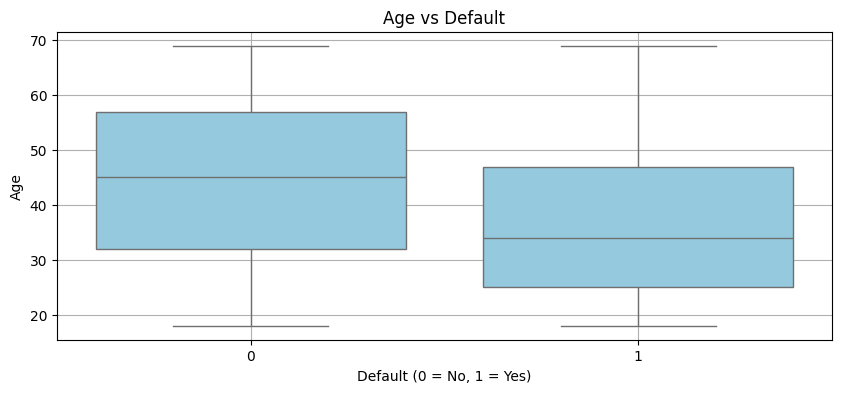

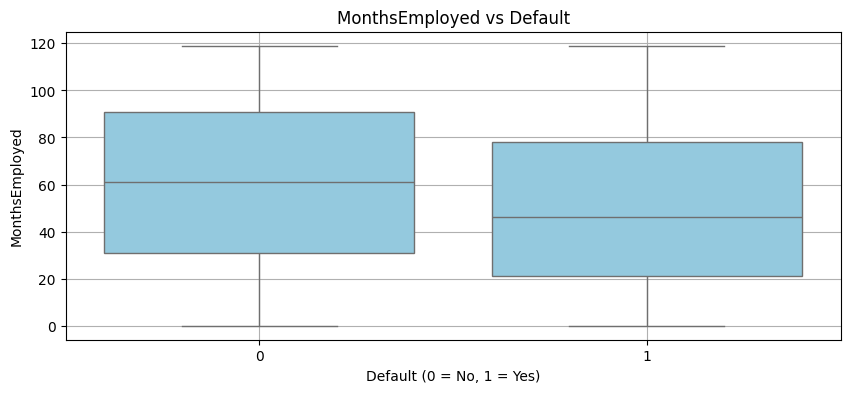

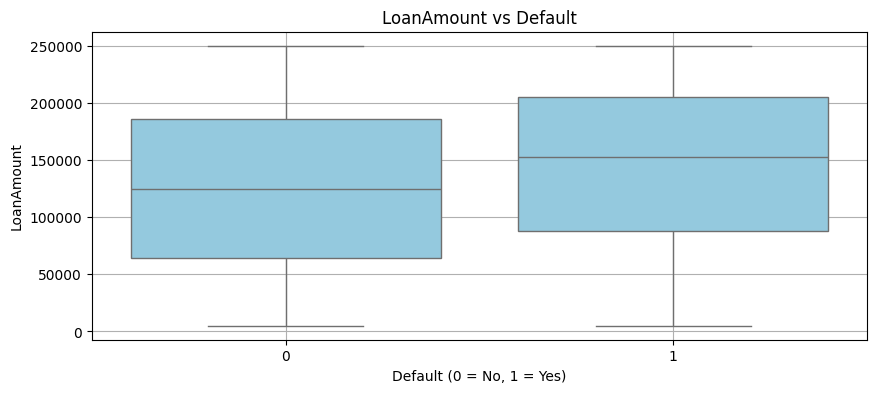

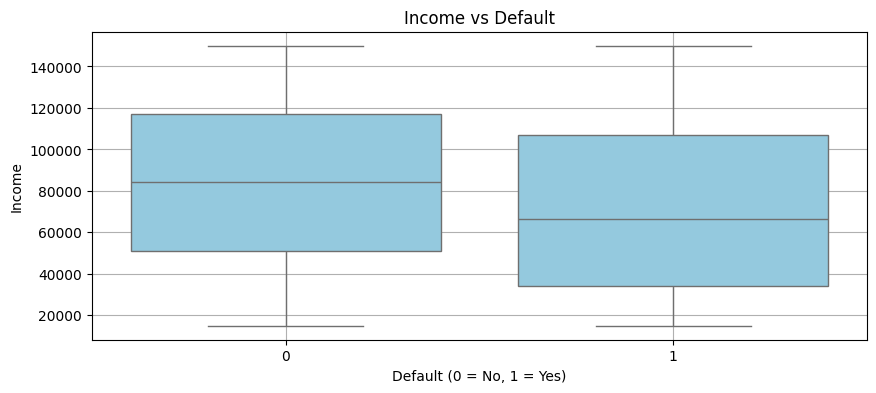

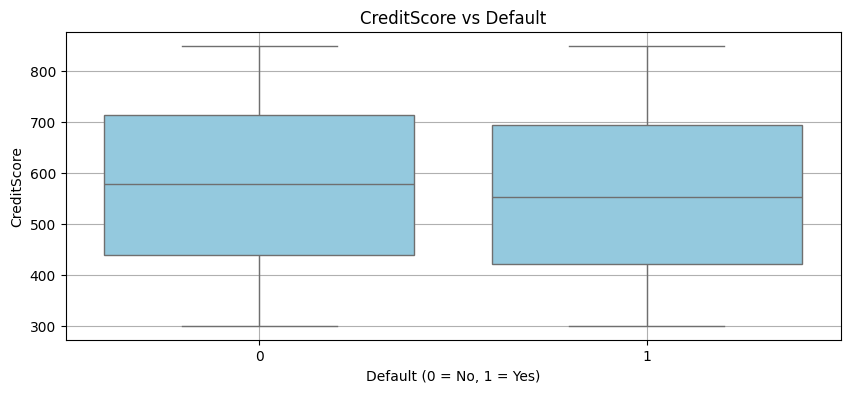

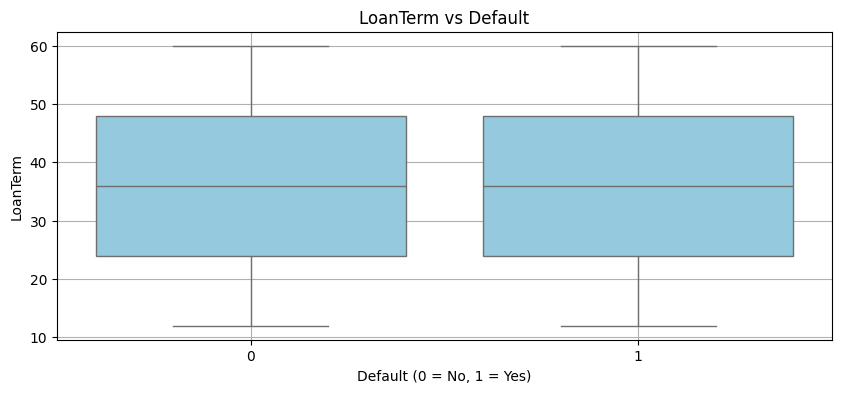

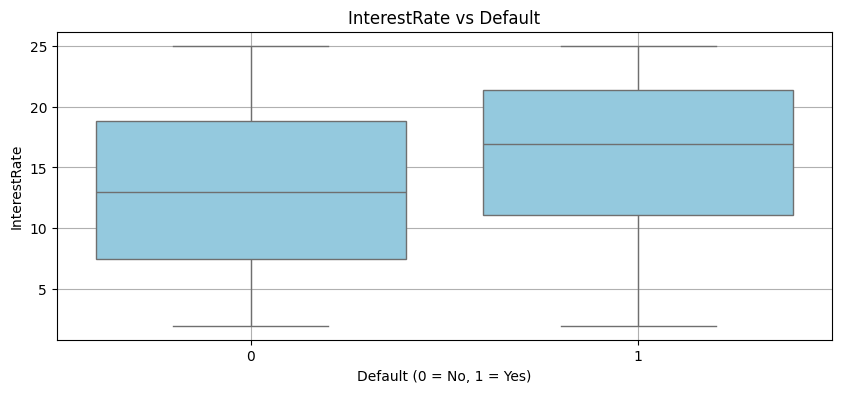

In [76]:
for col in ['Age','MonthsEmployed','LoanAmount','Income','CreditScore','LoanTerm', 'InterestRate']:
    plt.figure(figsize=(10,4)) 
    sns.boxplot(data=loan_df, x='Default', y=col,color='skyblue')
    plt.title(f'{col} vs Default')
    plt.xlabel('Default (0 = No, 1 = Yes)')
    plt.grid(True)
    plt.ylabel(col)
    plt.show()

2. Loan Defalut by Education Employment Type marital Status

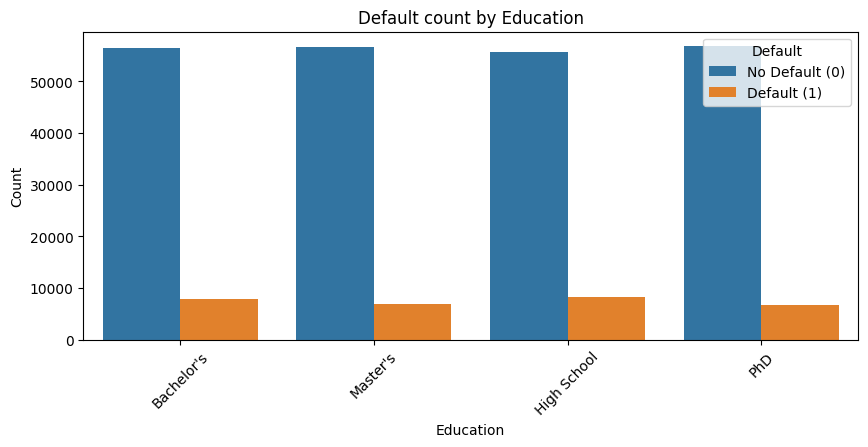

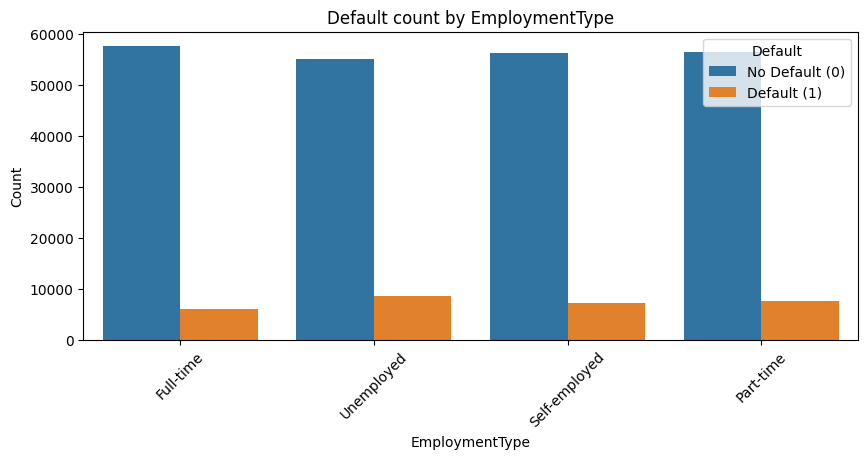

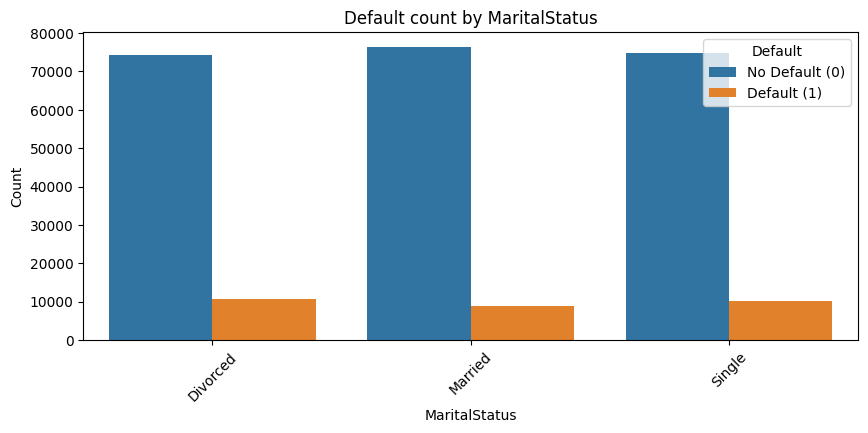

In [77]:
for col in ['Education', 'EmploymentType',"MaritalStatus"]:
    plt.figure(figsize=(10,4))   
    sns.countplot(data=loan_df, x=col, hue='Default')
    plt.title(f'Default count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Default', labels=['No Default (0)', 'Default (1)'])
    plt.show()

3. Default rate% by employment type

<Axes: xlabel='EmploymentType'>

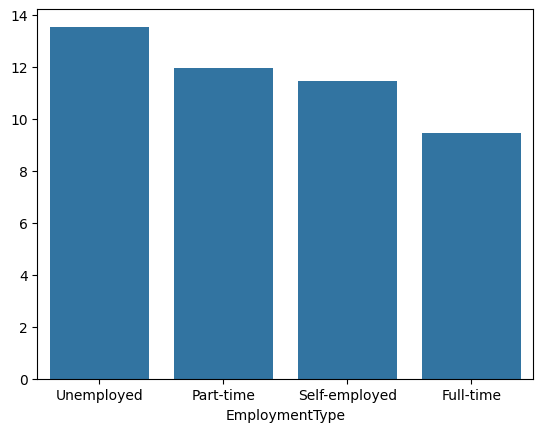

In [78]:

default_rate_employment = loan_df.groupby("EmploymentType")['Default'].mean().sort_values(ascending=False)* 100
sns.barplot(x=default_rate_employment.index,y=default_rate_employment.values)

<Axes: >

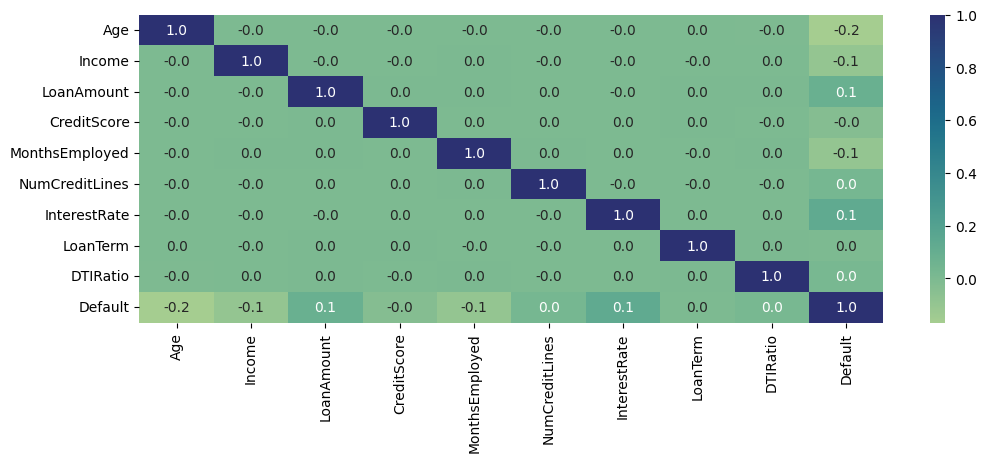

In [79]:
plt.figure(figsize=(12,4))
sns.heatmap(loan_df.corr(numeric_only=True),annot=True,cmap='crest',fmt='.1f')

- Default has no strong correlation with the numeric values, we can't solely depend on numeric values.

# Data cleaning and Pre Processing

In [80]:
# Remove unnecessary columns
loan_df = loan_df[['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','LoanTerm','Education','EmploymentType','LoanPurpose','Default']]

In [81]:
loan_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,Education,EmploymentType,LoanPurpose,Default
0,56,85994,50587,520,80,15.23,36,Bachelor's,Full-time,Other,0
1,69,50432,124440,458,15,4.81,60,Master's,Full-time,Other,0
2,46,84208,129188,451,26,21.17,24,Master's,Unemployed,Auto,1
3,32,31713,44799,743,0,7.07,24,High School,Full-time,Business,0
4,60,20437,9139,633,8,6.51,48,Bachelor's,Unemployed,Auto,0
...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,14.11,12,Bachelor's,Full-time,Other,0
255343,32,51953,189899,511,14,11.55,24,High School,Part-time,Home,1
255344,56,84820,208294,597,70,5.29,60,High School,Self-employed,Auto,0
255345,42,85109,60575,809,40,20.90,48,High School,Part-time,Other,0


In [82]:
loan_df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [83]:
loan_df['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [84]:
loan_df['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [85]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   InterestRate    255347 non-null  float64
 6   LoanTerm        255347 non-null  int64  
 7   Education       255347 non-null  object 
 8   EmploymentType  255347 non-null  object 
 9   LoanPurpose     255347 non-null  object 
 10  Default         255347 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 21.4+ MB


In [86]:
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,13.492773,36.025894,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,6.636443,16.969330,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,2.000000,12.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,7.770000,24.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,13.460000,36.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,19.250000,48.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,25.000000,60.000000,1.000000


# Feature Selection and Model Building

In [87]:
# Importing Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report

In [88]:
X = loan_df.drop('Default', axis=1)
y = loan_df['Default']
print(X.shape)
print(y.shape)

# train test
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=42,test_size=.2)

(255347, 10)
(255347,)


In [89]:
X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'InterestRate', 'LoanTerm', 'Education', 'EmploymentType',
       'LoanPurpose'],
      dtype='object')

In [93]:
# Create a list of categorical and numerical column names
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm']
cat_features = ['Education','EmploymentType', 'LoanPurpose']

In [94]:
# Scale the numeric features
numeric_transformer = Pipeline([
    ('scaler',StandardScaler())
    ])

# Scale Categorical features
cat_tranformer = Pipeline([
    ('ohe',OneHotEncoder(handle_unknown='ignore', drop='first',sparse_output=False))
    ])

# preprocess both steps
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',cat_tranformer,cat_features)],
    remainder='drop')



In [95]:


# Dictionary of models 
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Decision Tree"       : DecisionTreeClassifier(),
    "Random Forest"       : RandomForestClassifier()
}

results = {}
# Loop thorouh classifiers
for name, clf in models.items():

    print(f"\nTraining Model : {name}...")
    #Create a new model
    model = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier', clf)
        ])
    # fit the model
    model.fit(X_train, y_train)
    # Predict the model
    y_pred = model.predict(X_test)
    # Evaluate
    score = accuracy_score(y_test,y_pred)
    print(f"\n Accuracy score : {score:.4f}")
    print(f"\nClassification report:\n{classification_report(y_test,y_pred)}")

    # Store the result
    results[name] = score


# Compare the scores
print("\nComparing the models....")
for name,score in results.items():
    print(f"{name:20}: {score:.4f}")


Training Model : Logistic Regression...

 Accuracy score : 0.8855

Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.02      0.05      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.49     51070
weighted avg       0.86      0.89      0.84     51070


Training Model : Decision Tree...


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features


 Accuracy score : 0.8015

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.19      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070


Training Model : Random Forest...

 Accuracy score : 0.8858

Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.57      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.73      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070


Comparing the models....
Logistic Regression : 0.8855
Decision Tree       : 0.8015
Random Forest       : 0.8858


Accuracy: 0.886822009007245
ROC AUC: 0.7279990300296807


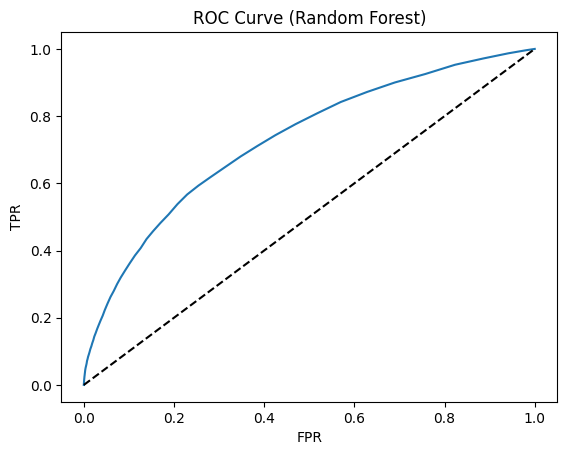

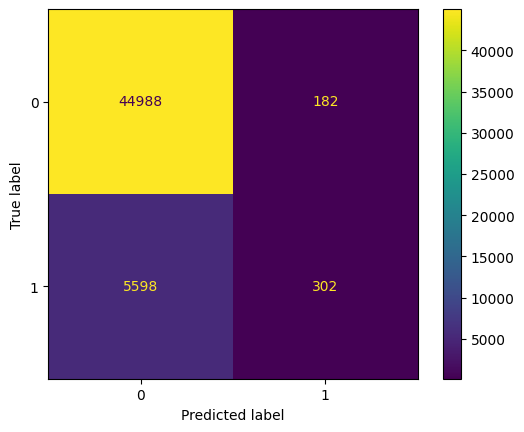

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example for one trained pipeline (Random Forest)
rf = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(); plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve (Random Forest)'); plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred); plt.show()
